# Demo 4: A demo project for IRIS Flower Classification
(Refer to:https://ai.plainenglish.io/iris-flower-classification-step-by-step-tutorial-c8728300dc9e)

## Introduction

### What is IRIS ?
IRIS Dataset is a dataset containing 3 different types of irises’ (Setosa, Versicolour, and Virginica) with measured petal and sepal length. 
<img src="iris.png">


### Aims
In this demo, we aim to 
1. analyze the data composition of IRIS, 
2. data distribution and visualization
3. use traditional machine learning algrothims for classification, 
etc.

## Dataset Loading
In this section, we illustrate how to use Pandas lib to load a dataset and list its items.

In [1]:
# import the required library
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-deep')
import sklearn

import warnings 
warnings.filterwarnings('ignore')


# dataset_soruce = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
dataset_source = './iris.csv'
col_name = ['sepal-length','sepal-width','petal-length','petal-width','class']
dataset = pd.read_csv(dataset_source, names=col_name)

In [2]:
# List some items at the beginning and the end
dataset

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# List only the top 10 items
dataset.head(10)


,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
# Show the summary of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# How many classes it has?
dataset['class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

Indicating we are going to the 3-class classification!

## Dataset Analysis

### Dataset Discription


In [7]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Characteristic Distribution

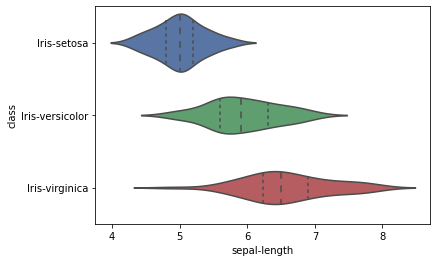

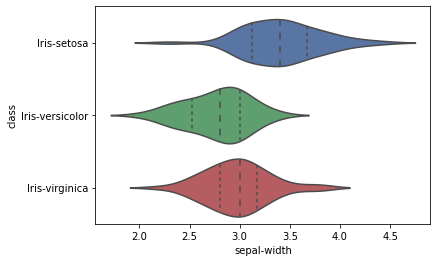

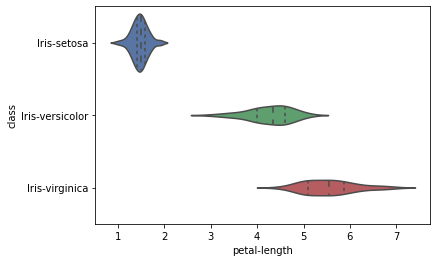

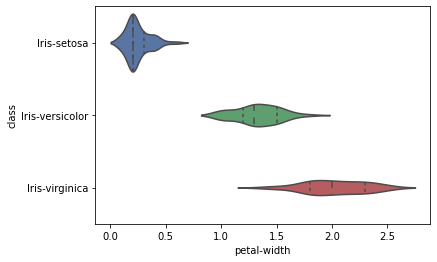

In [8]:
sns.violinplot(y='class', x='sepal-length', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x='sepal-width', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal-length', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal-width', data=dataset, inner='quartile')
plt.show()

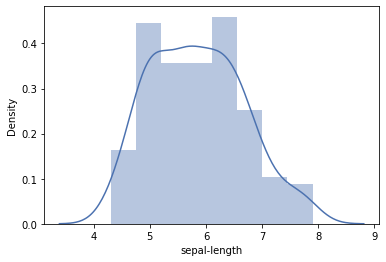

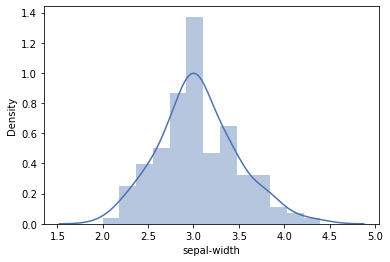

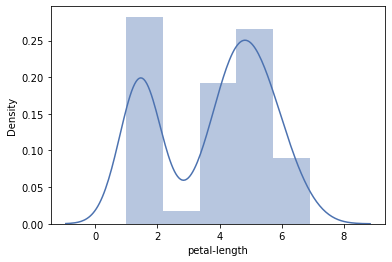

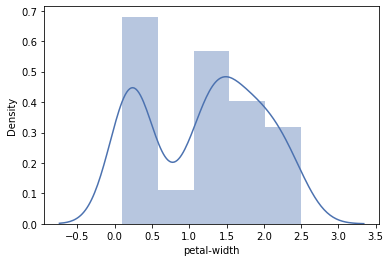

In [9]:
# Using another plot style
sns.distplot(dataset["sepal-length"], rug=False, hist=True); plt.show();
sns.distplot(dataset["sepal-width"], rug=False, hist=True); plt.show();
sns.distplot(dataset["petal-length"], rug=False, hist=True); plt.show();
sns.distplot(dataset["petal-width"], rug=False, hist=True); plt.show();

### Pair-wise Characteris Analysis

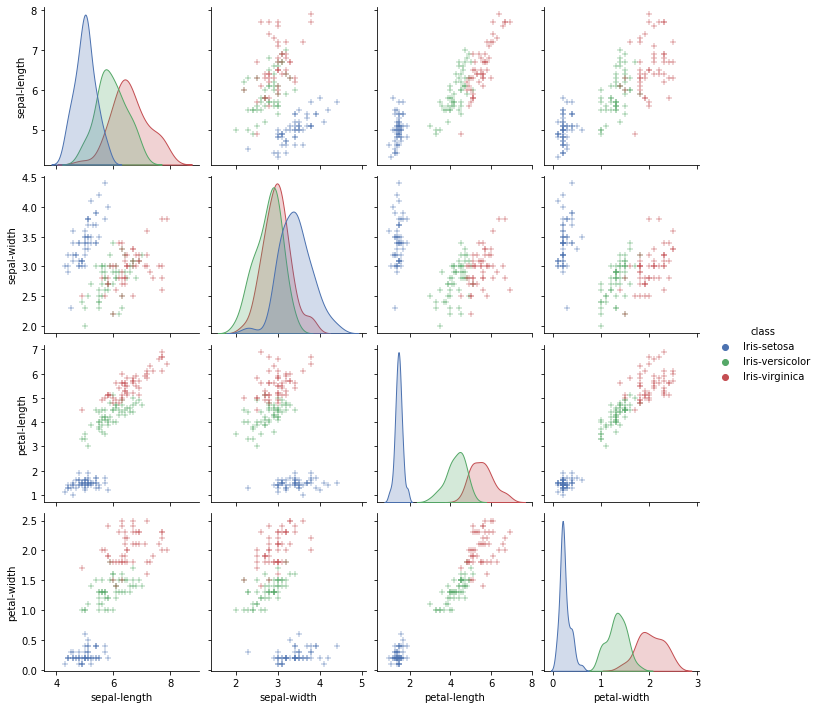

In [10]:
sns.pairplot(dataset, hue='class', markers='+')
plt.show()

\textbf{Finding}: Different classes show various pair-wise characteristic relationships, meaning they can be separable.

### Principle Component Analysis (PCA)

In [11]:
# Convert the dataset from Dataframe to Numpy array for PCA using sklearn
dataset_np = dataset.to_numpy()
X = dataset_np[:, :-1]
Y = dataset_np[:, -1]

from sklearn.decomposition import PCA

# Reduce the data dimension to 2
pca = PCA(n_components=2)
X_transform = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.92461621 0.05301557]


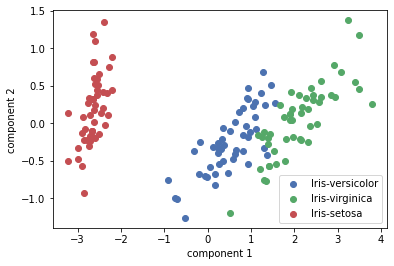

In [12]:
plt.figure(1)
for cls in set(dataset['class']):
    idx = np.where(Y == cls)[0]
    plt.scatter(X_transform[idx, 0], X_transform[idx, 1])
    
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.legend(list(set(dataset['class'])))

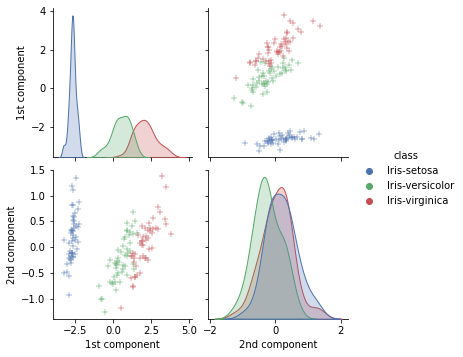

In [13]:
X_Y = np.concatenate((X_transform, Y[:, np.newaxis]), axis=1)
X_Y = pd.DataFrame(X_Y, columns=['1st component', '2nd component', 'class'])
X_Y = X_Y.astype({'1st component': 'float32'})
X_Y = X_Y.astype({'2nd component': 'float32'})
sns.pairplot(X_Y, hue='class', markers='+')

## Machine Learning Methods for IRIS Classification

### Classification and Results

In [14]:
# import the required libs
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Split the dataset according to the train-test ratio 8:2
X, Y = dataset.drop(['class'], axis=1), dataset['class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [15]:
# Classify the IRIS dataset, using 10-fold validation.
models = {
    'LR': LogisticRegression,
    'LDA': LinearDiscriminantAnalysis, 
    'KNN': KNeighborsClassifier, 
    'CART': DecisionTreeClassifier, 
    'NB': GaussianNB,
    'SVC': SVC
}
results = []
for model_name in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    model = models[model_name]()
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy') 
    for r in cv_results:
        results.append([float(r), model_name]) 
        mean, std = cv_results.mean(), cv_results.std()
    print('%s: %f (%f)' % (model_name, cv_results.mean(), cv_results.std()))

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.055277)
NB: 0.950000 (0.055277)
SVC: 0.966667 (0.040825)


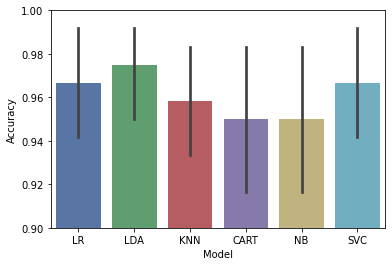

In [16]:
# Convert from python list to numpy array
results = np.array(results)
result_df = pd.DataFrame(results, columns=['Accuracy', 'Model']) 
result_df = result_df.astype({'Accuracy': 'float32'})
sns.barplot(x="Model", y="Accuracy", data=result_df) 
plt.ylim([0.9, 1.])
plt.show()

## Conclusion
All the employed traditional machine learning methods work well, achieving over 90% classification accuracy. 
The best model in this experiment is Linear Discriminant Analysis (LDA).